# 🔍 Sistema de Detecção de Fraudes em Cartões de Crédito

## 📖 Visão Geral

Este notebook implementa um sistema completo de detecção de fraudes em transações de cartão de crédito utilizando técnicas de Machine Learning. O projeto aborda desde a análise exploratória dos dados até a criação e avaliação de diferentes modelos de classificação.

## 🎯 Objetivos

- **Análise Exploratória**: Compreender a distribuição dos dados e identificar padrões de fraude
- **Pré-processamento**: Normalizar dados e tratar o desbalanceamento das classes
- **Modelagem**: Treinar e comparar diferentes algoritmos de classificação
- **Avaliação**: Analisar performance dos modelos com foco em recall (detecção de fraudes)
- **Implementação**: Preparar o modelo para uso em produção

## 📊 Dataset

O dataset utilizado contém transações de cartões de crédito europeias realizadas em setembro de 2013. As características principais incluem:

- **284.807 transações** no total
- **492 fraudes** (0.172% do dataset)
- **30 features** após transformação PCA (V1-V28) + Time + Amount + Class
- **Classes altamente desbalanceadas** - principal desafio do projeto

## 🛠️ Metodologia

1. **Análise Exploratória (EDA)**
   - Verificação de valores ausentes
   - Análise da distribuição das classes
   - Correlações com a variável alvo

2. **Pré-processamento**
   - Normalização da coluna Amount
   - Aplicação de SMOTE para balanceamento das classes
   - Divisão estratificada dos dados

3. **Modelagem**
   - Regressão Logística
   - Random Forest
   - XGBoost
   - Avaliação comparativa dos modelos

4. **Métricas de Avaliação**
   - **Recall**: Prioridade para detectar fraudes (reduzir falsos negativos)
   - **F1-Score**: Balanceamento entre precisão e recall
   - **AUC-ROC**: Capacidade discriminativa do modelo
   - **Matriz de Confusão**: Análise detalhada dos erros

## 🚨 Considerações Importantes

Em detecção de fraudes, é preferível ter **falsos positivos** (transações legítimas marcadas como fraude) do que **falsos negativos** (fraudes não detectadas). Por isso, priorizamos o **recall** como métrica principal.

---

**Desenvolvido por**: [Seu Nome]  
**Data**: 7 de julho de 2025  
**Ambiente**: Python 3.x, scikit-learn, XGBoost, imbalanced-learn

---

# 📊 Etapa 1: Importação de Dados e Análise Exploratória (EDA)

## 🎯 Objetivos desta Etapa

Nesta primeira etapa, vamos realizar as tarefas fundamentais para compreender nosso dataset de fraudes:

### 🔍 **Análise Exploratória dos Dados**
- Carregar e examinar a estrutura do dataset
- Verificar a qualidade dos dados (valores ausentes, duplicatas)
- Analisar a distribuição das classes (fraude vs. normal)
- Identificar correlações e padrões relevantes

### ⚙️ **Pré-processamento Inicial**
- Normalizar variáveis numéricas (coluna Amount)
- Preparar os dados para modelagem
- Dividir dataset em treino e teste

### 📈 **Insights Esperados**
- Confirmar o desbalanceamento extremo das classes (~0.17% fraudes)
- Identificar features mais correlacionadas com fraudes
- Estabelecer baseline para comparação de modelos

---

**💡 Nota Importante**: O dataset de fraudes é extremamente desbalanceado, o que torna a detecção um desafio interessante de classificação. Nosso foco será maximizar a detecção de fraudes (recall) minimizando falsos negativos.

---

## 🚀 Iniciando a Análise

In [1]:
# =============================================================================
# 📦 IMPORTAÇÃO DE BIBLIOTECAS E CONFIGURAÇÕES INICIAIS
# =============================================================================

# 📊 Manipulação e Análise de Dados
import pandas as pd
import numpy as np
import os

# 📈 Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🤖 Machine Learning - Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 📏 Machine Learning - Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# ⚖️ Balanceamento de Classes
from imblearn.over_sampling import SMOTE

# 💾 Persistência de Modelos
import joblib

# =============================================================================
# ⚙️ CONFIGURAÇÕES GLOBAIS
# =============================================================================

# Configurações para exibição de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

# Configurações para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Seed para reprodutibilidade
np.random.seed(42)

print("✅ Bibliotecas importadas com sucesso!")
print("⚙️ Configurações aplicadas!")

# =============================================================================
# 📂 CARREGAMENTO DOS DADOS
# =============================================================================

print("\n📥 Carregando dataset de fraudes...")

try:
    # Carregando os dados
    df = pd.read_csv('../data/creditcard.csv')
    
    print(f"✅ Dataset carregado com sucesso!")
    print(f"📊 Shape: {df.shape}")
    print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Exibindo primeiras linhas
    print("\n📋 Primeiras 5 linhas do dataset:")
    display(df.head())
    
    # Informações básicas do dataset
    print("\n📊 Informações gerais do dataset:")
    print(f"• Número de linhas: {df.shape[0]:,}")
    print(f"• Número de colunas: {df.shape[1]}")
    print(f"• Tipos de dados:")
    for dtype in df.dtypes.value_counts().items():
        print(f"  - {dtype[0]}: {dtype[1]} colunas")
    
except FileNotFoundError:
    print("❌ Erro: Arquivo 'creditcard.csv' não encontrado!")
    print("🔍 Verifique se o arquivo está no diretório '../data/'")
except Exception as e:
    print(f"❌ Erro ao carregar o dataset: {str(e)}")

✅ Bibliotecas importadas com sucesso!
⚙️ Configurações aplicadas!

📥 Carregando dataset de fraudes...
✅ Dataset carregado com sucesso!
📊 Shape: (284807, 31)
💾 Tamanho em memória: 67.36 MB

📋 Primeiras 5 linhas do dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0



📊 Informações gerais do dataset:
• Número de linhas: 284,807
• Número de colunas: 31
• Tipos de dados:
  - float64: 30 colunas
  - int64: 1 colunas


# 🔍 Verificação da Qualidade dos Dados

## 📋 Valores Ausentes e Integridade

Vamos verificar a qualidade e integridade do nosso dataset, identificando possíveis problemas que podem afetar a modelagem.

In [2]:
# =============================================================================
# 🔍 ANÁLISE DA QUALIDADE DOS DADOS
# =============================================================================

print("🔍 Verificando a qualidade e integridade dos dados...")
print("="*60)

# Verificando valores nulos
print("📊 Análise de Valores Ausentes:")
valores_nulos = df.isnull().sum()
total_nulos = valores_nulos.sum()

if total_nulos == 0:
    print("✅ Excelente! Não há valores ausentes no dataset")
else:
    print(f"⚠️ Encontrados {total_nulos} valores ausentes:")
    print(valores_nulos[valores_nulos > 0])

print(f"\n📈 Percentual de valores ausentes: {(total_nulos / len(df)) * 100:.4f}%")

# Verificando duplicatas
print("\n📊 Análise de Duplicatas:")
duplicatas = df.duplicated().sum()
if duplicatas == 0:
    print("✅ Não há registros duplicados")
else:
    print(f"⚠️ Encontradas {duplicatas} linhas duplicadas ({(duplicatas/len(df))*100:.2f}%)")

# Informações básicas sobre os dados
print("\n📊 Resumo da Qualidade dos Dados:")
print(f"• Total de registros: {len(df):,}")
print(f"• Registros únicos: {len(df) - duplicatas:,}")
print(f"• Completude dos dados: {((len(df) * len(df.columns) - total_nulos) / (len(df) * len(df.columns))) * 100:.2f}%")

# Verificando tipos de dados
print("\n📊 Tipos de Dados:")
print(df.dtypes.value_counts())

print("\n" + "="*60)
print("✅ Verificação de qualidade concluída!")

🔍 Verificando a qualidade e integridade dos dados...
📊 Análise de Valores Ausentes:
✅ Excelente! Não há valores ausentes no dataset

📈 Percentual de valores ausentes: 0.0000%

📊 Análise de Duplicatas:
⚠️ Encontradas 1081 linhas duplicadas (0.38%)

📊 Resumo da Qualidade dos Dados:
• Total de registros: 284,807
• Registros únicos: 283,726
• Completude dos dados: 100.00%

📊 Tipos de Dados:
float64    30
int64       1
Name: count, dtype: int64

✅ Verificação de qualidade concluída!


# 🎯 Análise da Variável Alvo (Target)

## 📊 Distribuição das Classes: Fraude vs. Normal

Vamos analisar a distribuição da nossa variável alvo (Class) para confirmar o desbalanceamento das classes e entender o desafio que enfrentaremos na modelagem.

🎯 Analisando a distribuição da variável alvo...
📊 Distribuição das Classes:
• Transações Normais (0): 284,315 (99.827%)
• Transações Fraudulentas (1): 492 (0.173%)

⚖️ Proporção de Desbalanceamento: 577.9:1
   (Para cada fraude, há 578 transações normais)


C:\Users\MMARAGAO\AppData\Local\Temp\ipykernel_16632\87217862.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df, x='Class', palette=['skyblue', 'salmon'])


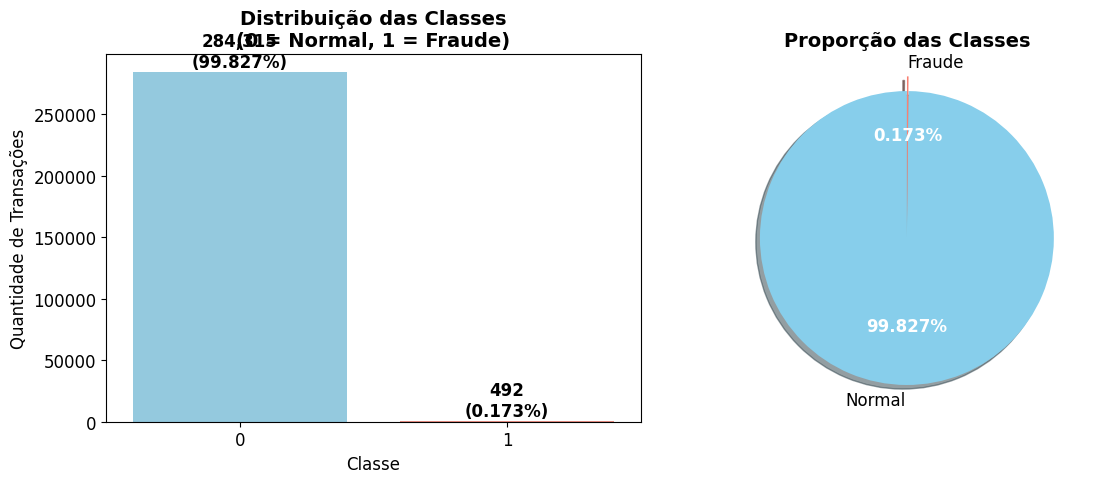


📈 Estatísticas da Variável Alvo:
• Total de transações: 284,807
• Taxa de fraude: 0.1727%
• Frequência de fraude: 1 em cada 578 transações

🚨 Alerta de Desbalanceamento:
• Este é um dataset EXTREMAMENTE desbalanceado!
• Estratégias necessárias: SMOTE, class_weight, métricas adequadas
• Foco principal: RECALL (detectar o máximo de fraudes possível)

✅ Análise da variável alvo concluída!


In [3]:
# =============================================================================
# 🎯 ANÁLISE DA VARIÁVEL ALVO (CLASS)
# =============================================================================

print("🎯 Analisando a distribuição da variável alvo...")
print("="*60)

# Contagem das classes
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("📊 Distribuição das Classes:")
print(f"• Transações Normais (0): {class_counts[0]:,} ({class_percentages[0]:.3f}%)")
print(f"• Transações Fraudulentas (1): {class_counts[1]:,} ({class_percentages[1]:.3f}%)")

# Calculando a proporção de desbalanceamento
ratio_imbalance = class_counts[0] / class_counts[1]
print(f"\n⚖️ Proporção de Desbalanceamento: {ratio_imbalance:.1f}:1")
print(f"   (Para cada fraude, há {ratio_imbalance:.0f} transações normais)")

# Visualização da distribuição
plt.figure(figsize=(12, 5))

# Subplot 1: Gráfico de barras
plt.subplot(1, 2, 1)
bars = sns.countplot(data=df, x='Class', palette=['skyblue', 'salmon'])
plt.title('Distribuição das Classes\n(0 = Normal, 1 = Fraude)', fontsize=14, fontweight='bold')
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

# Adicionando valores nas barras
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{int(height):,}\n({class_percentages[i]:.3f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Subplot 2: Gráfico de pizza
plt.subplot(1, 2, 2)
colors = ['skyblue', 'salmon']
wedges, texts, autotexts = plt.pie(class_counts.values, 
                                   labels=['Normal', 'Fraude'],
                                   autopct='%1.3f%%',
                                   colors=colors,
                                   explode=[0, 0.1],  # Destacar fraudes
                                   shadow=True,
                                   startangle=90)

plt.title('Proporção das Classes', fontsize=14, fontweight='bold')

# Melhorar a legibilidade dos textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Estatísticas adicionais
print(f"\n📈 Estatísticas da Variável Alvo:")
print(f"• Total de transações: {len(df):,}")
print(f"• Taxa de fraude: {class_percentages[1]:.4f}%")
print(f"• Frequência de fraude: 1 em cada {int(1/class_percentages[1]*100)} transações")

# Aviso sobre o desbalanceamento
print(f"\n🚨 Alerta de Desbalanceamento:")
print(f"• Este é um dataset EXTREMAMENTE desbalanceado!")
print(f"• Estratégias necessárias: SMOTE, class_weight, métricas adequadas")
print(f"• Foco principal: RECALL (detectar o máximo de fraudes possível)")

print("\n" + "="*60)
print("✅ Análise da variável alvo concluída!")

# 📊 Análise de Correlações com a Variável Alvo

## 🔍 Identificando Features Mais Relevantes

Vamos analisar as correlações das features com a variável alvo (Class) para identificar quais características são mais importantes para detectar fraudes.

🔍 Analisando correlações das features com a variável alvo...
📊 Top 10 Features Mais Correlacionadas com Fraudes:
(Valores próximos de ±1 indicam maior correlação)
--------------------------------------------------
•      V17: -0.3265 - 📉 Negativa - 🔴 Forte
•      V14: -0.3025 - 📉 Negativa - 🔴 Forte
•      V12: -0.2606 - 📉 Negativa - 🟡 Moderada
•      V10: -0.2169 - 📉 Negativa - 🟡 Moderada
•      V16: -0.1965 - 📉 Negativa - 🟡 Moderada
•       V3: -0.1930 - 📉 Negativa - 🟡 Moderada
•       V7: -0.1873 - 📉 Negativa - 🟡 Moderada
•      V11:  0.1549 - 📈 Positiva - 🟡 Moderada
•       V4:  0.1334 - 📈 Positiva - 🟡 Moderada
•      V18: -0.1115 - 📉 Negativa - 🟡 Moderada


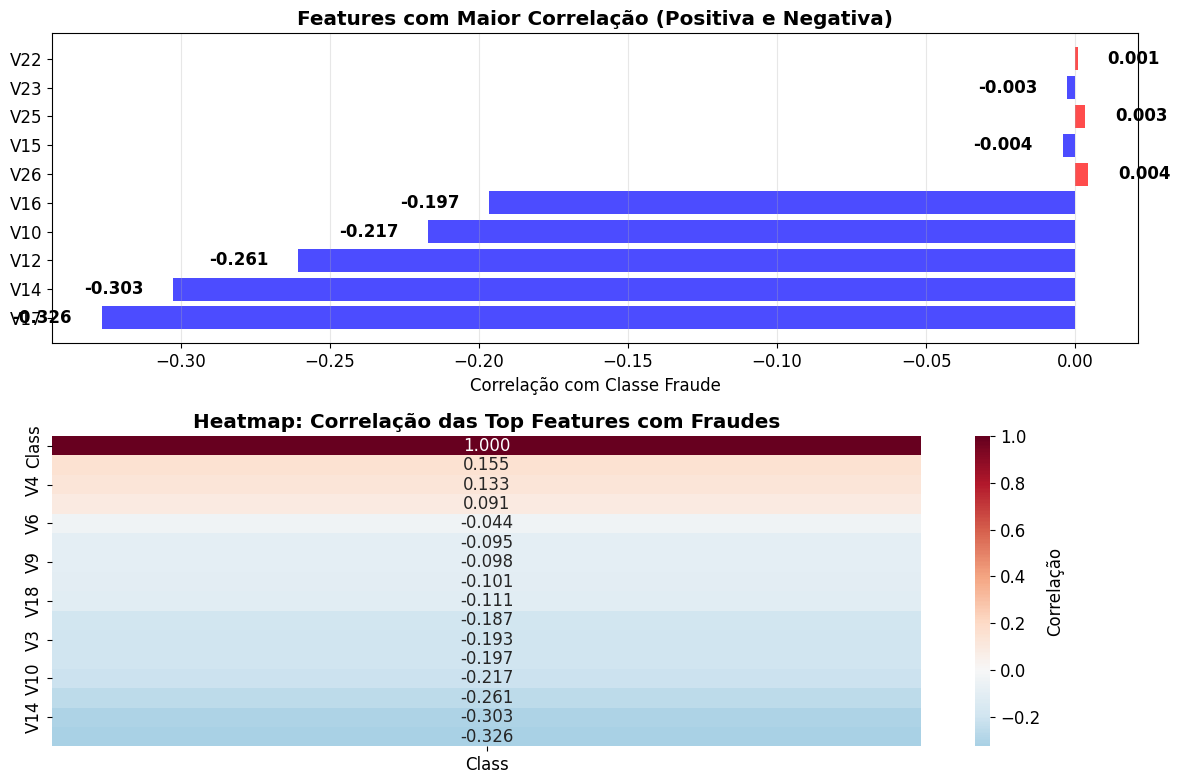


📈 Insights das Correlações:
• Feature mais correlacionada positivamente: V17 (-0.3265)
• Feature mais correlacionada negativamente: V22 (0.0008)
• Número de features com correlação |> 0.1|: 11
• Número de features com correlação |> 0.3|: 2

✅ Análise de correlações concluída!


In [4]:
# =============================================================================
# 📊 ANÁLISE DE CORRELAÇÕES COM A VARIÁVEL ALVO
# =============================================================================

print("🔍 Analisando correlações das features com a variável alvo...")
print("="*60)

# Calculando correlações com a variável Class
correlacoes = df.corr()['Class'].sort_values(key=abs, ascending=False)

print("📊 Top 10 Features Mais Correlacionadas com Fraudes:")
print("(Valores próximos de ±1 indicam maior correlação)")
print("-" * 50)

# Exibindo as 10 correlações mais fortes (excluindo a própria Class)
top_correlacoes = correlacoes.drop('Class').head(10)
for feature, corr in top_correlacoes.items():
    direção = "📈 Positiva" if corr > 0 else "📉 Negativa"
    intensidade = "🔴 Forte" if abs(corr) > 0.3 else "🟡 Moderada" if abs(corr) > 0.1 else "🟢 Fraca"
    print(f"• {feature:>8}: {corr:>7.4f} - {direção} - {intensidade}")

# Visualização das correlações
plt.figure(figsize=(12, 8))

# Subplot 1: Top correlações positivas e negativas
plt.subplot(2, 1, 1)
top_pos_neg = pd.concat([
    correlacoes.drop('Class').head(5),  # Top 5 positivas
    correlacoes.drop('Class').tail(5)   # Top 5 negativas
])

colors = ['red' if x > 0 else 'blue' for x in top_pos_neg.values]
bars = plt.barh(range(len(top_pos_neg)), top_pos_neg.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_pos_neg)), top_pos_neg.index)
plt.xlabel('Correlação com Classe Fraude')
plt.title('Features com Maior Correlação (Positiva e Negativa)', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Adicionando valores nas barras
for i, (bar, value) in enumerate(zip(bars, top_pos_neg.values)):
    plt.text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}', 
             ha='left' if value > 0 else 'right', va='center', fontweight='bold')

# Subplot 2: Heatmap das correlações mais relevantes
plt.subplot(2, 1, 2)
features_relevantes = correlacoes.drop('Class').head(15).index.tolist() + ['Class']
corr_matrix = df[features_relevantes].corr()

sns.heatmap(corr_matrix[['Class']].sort_values('Class', ascending=False), 
            annot=True, cmap='RdBu_r', center=0, fmt='.3f',
            cbar_kws={'label': 'Correlação'})
plt.title('Heatmap: Correlação das Top Features com Fraudes', fontweight='bold')
plt.xlabel('')

plt.tight_layout()
plt.show()

# Insights sobre as correlações
print(f"\n📈 Insights das Correlações:")
print(f"• Feature mais correlacionada positivamente: {correlacoes.drop('Class').index[0]} ({correlacoes.drop('Class').iloc[0]:.4f})")
print(f"• Feature mais correlacionada negativamente: {correlacoes.drop('Class').index[-1]} ({correlacoes.drop('Class').iloc[-1]:.4f})")
print(f"• Número de features com correlação |> 0.1|: {sum(abs(correlacoes.drop('Class')) > 0.1)}")
print(f"• Número de features com correlação |> 0.3|: {sum(abs(correlacoes.drop('Class')) > 0.3)}")

print("\n" + "="*60)
print("✅ Análise de correlações concluída!")

# ⚙️ Pré-processamento: Normalização e Preparação dos Dados

## 📊 Etapa 2: Normalização da Coluna Amount

A coluna `Amount` representa valores monetários das transações e precisa ser normalizada para ter a mesma escala das outras features (que já foram processadas via PCA).

⚙️ Iniciando processo de normalização da coluna Amount...
📋 Estrutura atual do dataset:
• Colunas disponíveis: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
• Shape do DataFrame: (284807, 31)

💰 Análise da coluna Amount (antes da normalização):
--------------------------------------------------
count   284807.0000
mean        88.3496
std        250.1201
min          0.0000
25%          5.6000
50%         22.0000
75%         77.1650
max      25691.1600
Name: Amount, dtype: float64


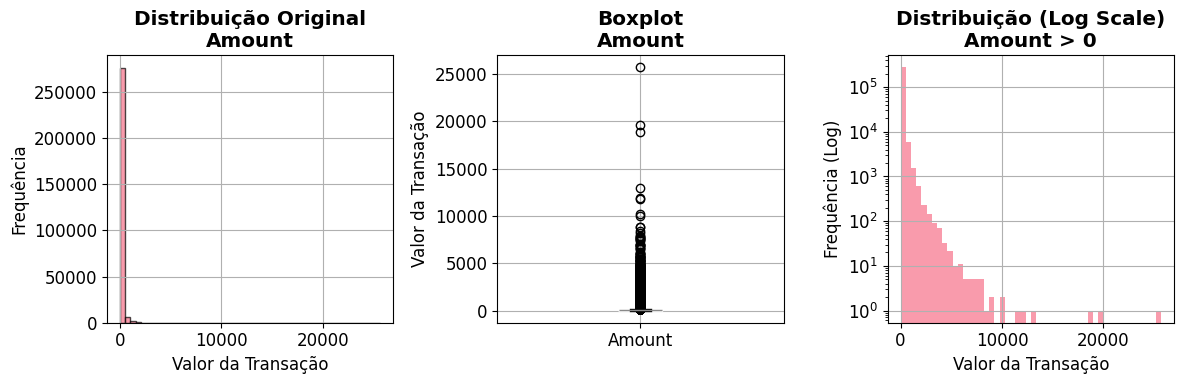


📊 Características da coluna Amount:
• Valor mínimo: 0.00
• Valor máximo: 25,691.16
• Média: 88.35
• Mediana: 22.00
• Desvio padrão: 250.12
• Transações gratuitas (Amount = 0): 1,825



In [5]:
# =============================================================================
# ⚙️ NORMALIZAÇÃO DA COLUNA AMOUNT
# =============================================================================

print("⚙️ Iniciando processo de normalização da coluna Amount...")
print("="*60)

# Verificando as colunas disponíveis no DataFrame
print("📋 Estrutura atual do dataset:")
print(f"• Colunas disponíveis: {list(df.columns)}")
print(f"• Shape do DataFrame: {df.shape}")

# Analisando a coluna Amount antes da normalização
if 'Amount' in df.columns:
    print("\n💰 Análise da coluna Amount (antes da normalização):")
    print("-" * 50)
    
    # Estatísticas descritivas
    amount_stats = df['Amount'].describe()
    print(amount_stats)
    
    # Visualizando a distribuição
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Histograma
    plt.subplot(1, 3, 1)
    df['Amount'].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribuição Original\nAmount', fontweight='bold')
    plt.xlabel('Valor da Transação')
    plt.ylabel('Frequência')
    
    # Subplot 2: Boxplot
    plt.subplot(1, 3, 2)
    df.boxplot(column='Amount', ax=plt.gca())
    plt.title('Boxplot\nAmount', fontweight='bold')
    plt.ylabel('Valor da Transação')
    
    # Subplot 3: Log scale
    plt.subplot(1, 3, 3)
    df[df['Amount'] > 0]['Amount'].hist(bins=50, alpha=0.7, log=True)
    plt.title('Distribuição (Log Scale)\nAmount > 0', fontweight='bold')
    plt.xlabel('Valor da Transação')
    plt.ylabel('Frequência (Log)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Características da coluna Amount:")
    print(f"• Valor mínimo: {amount_stats['min']:.2f}")
    print(f"• Valor máximo: {amount_stats['max']:,.2f}")
    print(f"• Média: {amount_stats['mean']:.2f}")
    print(f"• Mediana: {amount_stats['50%']:.2f}")
    print(f"• Desvio padrão: {amount_stats['std']:.2f}")
    print(f"• Transações gratuitas (Amount = 0): {sum(df['Amount'] == 0):,}")
    
else:
    print("⚠️ Coluna 'Amount' não encontrada no dataset!")

print("\n" + "="*60)

🔄 Aplicando normalização StandardScaler...

✅ Realizando normalização da coluna Amount...
✅ Normalização concluída!


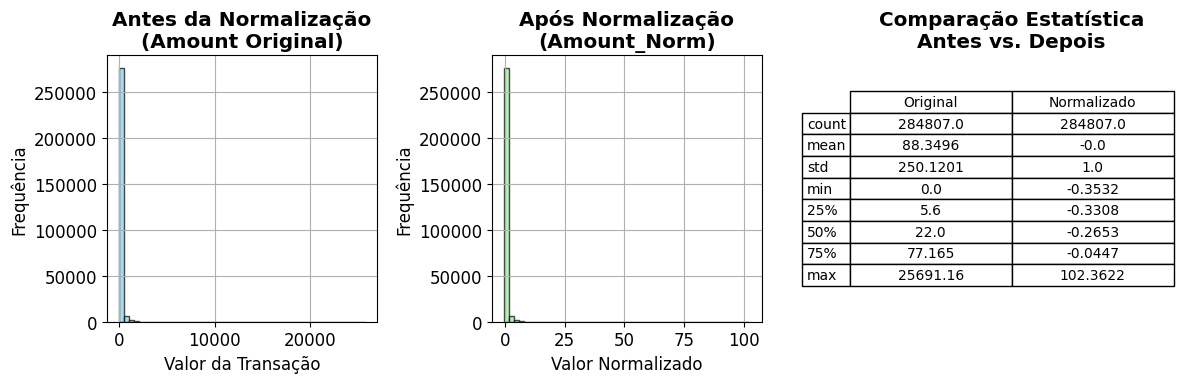


📊 Resultado da Normalização:
• Nova coluna criada: Amount_Norm
• Média da coluna normalizada: -0.000000 (≈ 0)
• Desvio padrão: 1.000002 (≈ 1)
• Scaler salvo em: '../models/amount_scaler.pkl'

✅ Processo de normalização concluído!


In [6]:
# =============================================================================
# 🔄 PROCESSO DE NORMALIZAÇÃO
# =============================================================================

print("🔄 Aplicando normalização StandardScaler...")

# Verificar se a normalização já foi feita
if 'Amount' in df.columns and 'Amount_Norm' not in df.columns:
    print("\n✅ Realizando normalização da coluna Amount...")
    
    # Criar o scaler e aplicar a transformação
    scaler = StandardScaler()
    df['Amount_Norm'] = scaler.fit_transform(df[['Amount']])
    
    # Salvar o scaler para uso posterior
    os.makedirs('../models', exist_ok=True)
    joblib.dump(scaler, '../models/amount_scaler.pkl')
    
    # Remover a coluna original
    amount_original = df['Amount'].copy()  # Backup para comparação
    df.drop(['Amount'], axis=1, inplace=True)
    
    print("✅ Normalização concluída!")
    
    # Visualizar o resultado da normalização
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Antes da normalização
    plt.subplot(1, 3, 1)
    amount_original.hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Antes da Normalização\n(Amount Original)', fontweight='bold')
    plt.xlabel('Valor da Transação')
    plt.ylabel('Frequência')
    
    # Subplot 2: Depois da normalização
    plt.subplot(1, 3, 2)
    df['Amount_Norm'].hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Após Normalização\n(Amount_Norm)', fontweight='bold')
    plt.xlabel('Valor Normalizado')
    plt.ylabel('Frequência')
    
    # Subplot 3: Comparação de estatísticas
    plt.subplot(1, 3, 3)
    comparison = pd.DataFrame({
        'Original': amount_original.describe(),
        'Normalizado': df['Amount_Norm'].describe()
    })
    
    # Criar uma tabela visual
    plt.axis('tight')
    plt.axis('off')
    table = plt.table(cellText=comparison.round(4).values,
                     rowLabels=comparison.index,
                     colLabels=comparison.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    plt.title('Comparação Estatística\nAntes vs. Depois', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Resultado da Normalização:")
    print(f"• Nova coluna criada: Amount_Norm")
    print(f"• Média da coluna normalizada: {df['Amount_Norm'].mean():.6f} (≈ 0)")
    print(f"• Desvio padrão: {df['Amount_Norm'].std():.6f} (≈ 1)")
    print(f"• Scaler salvo em: '../models/amount_scaler.pkl'")
    
elif 'Amount_Norm' in df.columns:
    print("✅ Normalização já foi realizada anteriormente.")
    print(f"\n📊 Estatísticas da coluna Amount_Norm:")
    print(df['Amount_Norm'].describe())
else:
    print("❌ Erro: Coluna Amount não encontrada no dataset original.")

print("\n" + "="*60)
print("✅ Processo de normalização concluído!")

# 🔄 Divisão dos Dados e Balanceamento

## 📊 Etapa 3: Preparação para Modelagem

Vamos dividir os dados em treino e teste, e aplicar SMOTE para balancear as classes no conjunto de treino.

In [7]:
# =============================================================================
# 🔄 DIVISÃO DOS DADOS EM TREINO E TESTE
# =============================================================================

print("🔄 Preparando dados para modelagem...")
print("="*60)

# Separando features e target
print("📊 Separando features e variável alvo...")

# Removendo colunas que não serão usadas na modelagem
features_to_drop = ['Class', 'Time']  # Time não é relevante para o modelo
available_features = [col for col in features_to_drop if col in df.columns]

print(f"• Colunas removidas: {available_features}")

X = df.drop(available_features, axis=1)
y = df['Class']

print(f"• Shape das features (X): {X.shape}")
print(f"• Shape do target (y): {y.shape}")
print(f"• Features utilizadas: {X.columns.tolist()}")

# Divisão estratificada treino/teste
print(f"\n🎯 Realizando divisão estratificada (80% treino, 20% teste)...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"✅ Divisão concluída:")
print(f"• Treino: {X_train.shape[0]:,} amostras ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"• Teste: {X_test.shape[0]:,} amostras ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verificando a distribuição das classes em cada conjunto
print(f"\n📊 Distribuição das classes após divisão:")
print("Conjunto de Treino:")
train_dist = y_train.value_counts()
for classe, count in train_dist.items():
    print(f"  • Classe {classe}: {count:,} ({count/len(y_train)*100:.3f}%)")

print("Conjunto de Teste:")
test_dist = y_test.value_counts()
for classe, count in test_dist.items():
    print(f"  • Classe {classe}: {count:,} ({count/len(y_test)*100:.3f}%)")

print("\n" + "="*60)

🔄 Preparando dados para modelagem...
📊 Separando features e variável alvo...
• Colunas removidas: ['Class', 'Time']
• Shape das features (X): (284807, 29)
• Shape do target (y): (284807,)
• Features utilizadas: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Norm']

🎯 Realizando divisão estratificada (80% treino, 20% teste)...
✅ Divisão concluída:
• Treino: 227,845 amostras (80.0%)
• Teste: 56,962 amostras (20.0%)

📊 Distribuição das classes após divisão:
Conjunto de Treino:
  • Classe 0: 227,451 (99.827%)
  • Classe 1: 394 (0.173%)
Conjunto de Teste:
  • Classe 0: 56,864 (99.828%)
  • Classe 1: 98 (0.172%)



⚖️ Aplicando SMOTE para balanceamento das classes...
🔍 Situação ANTES do SMOTE:
• Classes desbalanceadas no treino:
  - Classe 0: 227,451 amostras (99.827%)
  - Classe 1: 394 amostras (0.173%)
• Proporção de desbalanceamento: 577.3:1

🔄 Aplicando SMOTE...
✅ SMOTE aplicado com sucesso!

📊 Situação APÓS o SMOTE:
  - Classe 0: 227,451 amostras (50.0%)
  - Classe 1: 227,451 amostras (50.0%)


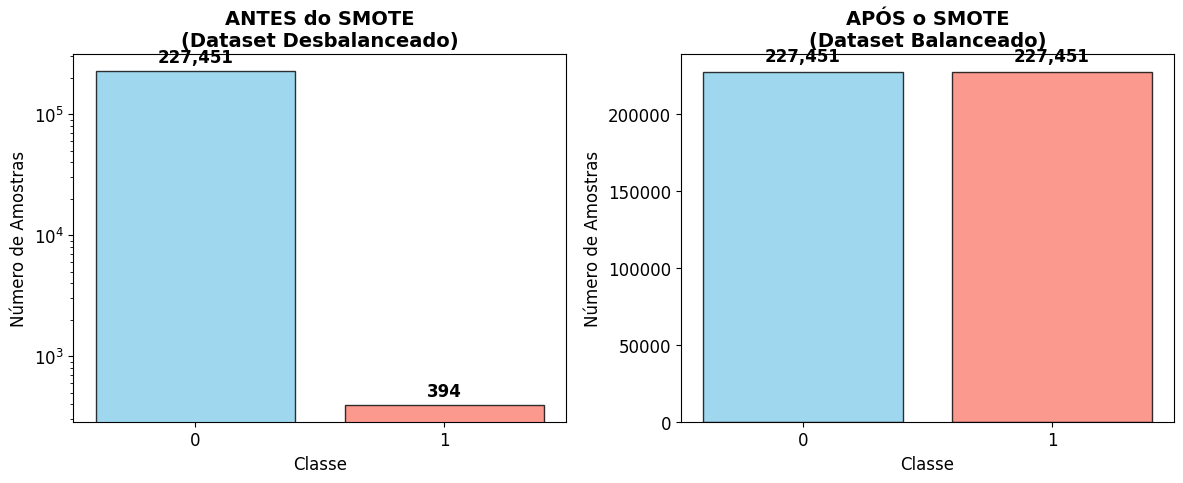


📈 Resumo do Impacto do SMOTE:
• Amostras originais (treino): 227,845
• Amostras após SMOTE: 454,902
• Aumento total: 227,057 amostras (99.7%)
• Amostras sintéticas de fraude criadas: 227,057

🎯 Datasets finais preparados:
• X_train_sm: (454902, 29) (com SMOTE)
• y_train_sm: 454,902 (balanceado)
• X_test: (56962, 29) (original, sem SMOTE)
• y_test: 56,962 (original, para avaliação realista)

✅ Preparação dos dados concluída! Pronto para modelagem.


In [8]:
# =============================================================================
# ⚖️ APLICAÇÃO DO SMOTE PARA BALANCEAMENTO DAS CLASSES
# =============================================================================

print("⚖️ Aplicando SMOTE para balanceamento das classes...")
print("="*60)

print("🔍 Situação ANTES do SMOTE:")
print(f"• Classes desbalanceadas no treino:")
before_counts = y_train.value_counts()
for classe, count in before_counts.items():
    print(f"  - Classe {classe}: {count:,} amostras ({count/len(y_train)*100:.3f}%)")

ratio_before = before_counts[0] / before_counts[1]
print(f"• Proporção de desbalanceamento: {ratio_before:.1f}:1")

# Aplicando SMOTE
print(f"\n🔄 Aplicando SMOTE...")
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"✅ SMOTE aplicado com sucesso!")

print(f"\n📊 Situação APÓS o SMOTE:")
after_counts = pd.Series(y_train_sm).value_counts()
for classe, count in after_counts.items():
    print(f"  - Classe {classe}: {count:,} amostras ({count/len(y_train_sm)*100:.1f}%)")

# Visualizando o impacto do SMOTE
plt.figure(figsize=(12, 5))

# Subplot 1: Antes do SMOTE
plt.subplot(1, 2, 1)
colors_before = ['skyblue', 'salmon']
bars1 = plt.bar(before_counts.index.astype(str), before_counts.values, 
                color=colors_before, alpha=0.8, edgecolor='black')
plt.title('ANTES do SMOTE\n(Dataset Desbalanceado)', fontweight='bold', fontsize=14)
plt.xlabel('Classe')
plt.ylabel('Número de Amostras')
plt.yscale('log')  # Escala log para melhor visualização

# Adicionando valores nas barras
for bar, count in zip(bars1, before_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() * 1.1,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Após o SMOTE
plt.subplot(1, 2, 2)
bars2 = plt.bar(after_counts.index.astype(str), after_counts.values, 
                color=colors_before, alpha=0.8, edgecolor='black')
plt.title('APÓS o SMOTE\n(Dataset Balanceado)', fontweight='bold', fontsize=14)
plt.xlabel('Classe')
plt.ylabel('Número de Amostras')

# Adicionando valores nas barras
for bar, count in zip(bars2, after_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() * 1.02,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Resumo do impacto do SMOTE
print(f"\n📈 Resumo do Impacto do SMOTE:")
print(f"• Amostras originais (treino): {len(X_train):,}")
print(f"• Amostras após SMOTE: {len(X_train_sm):,}")
print(f"• Aumento total: {len(X_train_sm) - len(X_train):,} amostras ({((len(X_train_sm) - len(X_train))/len(X_train)*100):.1f}%)")
print(f"• Amostras sintéticas de fraude criadas: {after_counts[1] - before_counts[1]:,}")

print(f"\n🎯 Datasets finais preparados:")
print(f"• X_train_sm: {X_train_sm.shape} (com SMOTE)")
print(f"• y_train_sm: {len(y_train_sm):,} (balanceado)")
print(f"• X_test: {X_test.shape} (original, sem SMOTE)")
print(f"• y_test: {len(y_test):,} (original, para avaliação realista)")

print("\n" + "="*60)
print("✅ Preparação dos dados concluída! Pronto para modelagem.")

# 🤖 Etapa 4: Modelagem e Avaliação de Algoritmos

## 🎯 Objetivos desta Etapa

Agora vamos treinar e comparar diferentes algoritmos de Machine Learning para detectar fraudes:

### 🔍 **Algoritmos a serem testados**
- **Regressão Logística**: Baseline linear simples e interpretável
- **Random Forest**: Ensemble robusto para features complexas
- **XGBoost**: Gradient boosting otimizado para performance
- **SVM**: Modelo de margem máxima (opcional por tempo)

### 📊 **Estratégia de Avaliação**
- **Foco no Recall**: Priorizar detecção de fraudes (minimizar falsos negativos)
- **Análise visual**: Matrizes de confusão e curvas ROC
- **Comparação objetiva**: Tabela consolidada de métricas

---

## 🚀 Iniciando a Modelagem

In [9]:
# =============================================================================
# 🔧 FUNÇÕES AUXILIARES PARA AVALIAÇÃO DE MODELOS
# =============================================================================

import warnings
warnings.filterwarnings('ignore')

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    """
    Função completa para avaliação de modelos de classificação
    com foco em detecção de fraudes
    """
    print(f"🔍 Avaliando modelo: {nome_modelo}")
    print("="*60)
    
    # Fazer predições
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    # Calcular métricas principais
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    
    # Relatório detalhado
    print(f"📊 Métricas de Performance:")
    print(f"• Accuracy:  {accuracy:.4f}")
    print(f"• Precision: {precision:.4f}")
    print(f"• Recall:    {recall:.4f} ⭐ (Métrica Principal)")
    print(f"• F1-Score:  {f1:.4f}")
    print(f"• AUC-ROC:   {auc_roc:.4f}")
    
    print(f"\n📋 Relatório de Classificação Detalhado:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Visualizações
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Subplot 1: Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusão - {nome_modelo}', fontweight='bold')
    axes[0].set_xlabel('Predito')
    axes[0].set_ylabel('Real')
    
    # Adicionar percentuais na matriz
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            axes[0].text(j+0.5, i+0.7, f'({cm[i,j]/total*100:.1f}%)', 
                        ha='center', va='center', color='red', fontsize=10)
    
    # Subplot 2: Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1].plot(fpr, tpr, linewidth=2, 
                 label=f'{nome_modelo} (AUC = {auc_roc:.4f})')
    axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Chance (AUC = 0.5)')
    axes[1].set_xlabel('Taxa de Falsos Positivos')
    axes[1].set_ylabel('Taxa de Verdadeiros Positivos')
    axes[1].set_title(f'Curva ROC - {nome_modelo}', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análise dos erros para fraudes
    tn, fp, fn, tp = cm.ravel()
    print(f"\n🎯 Análise Específica para Detecção de Fraudes:")
    print(f"• Fraudes detectadas corretamente: {tp:,} de {tp+fn:,} ({tp/(tp+fn)*100:.1f}%)")
    print(f"• Fraudes perdidas (falsos negativos): {fn:,} ({fn/(tp+fn)*100:.1f}%)")
    print(f"• Alarmes falsos: {fp:,} de {tn+fp:,} transações normais ({fp/(tn+fp)*100:.1f}%)")
    
    print("\n" + "="*60)
    print("✅ Avaliação concluída!\n")
    
    return {
        'modelo': nome_modelo,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    }

def get_metrics(modelo, X_test, y_test, nome_modelo):
    """
    Função simplificada para extrair métricas rapidamente
    """
    if modelo is None:
        return {
            'Modelo': nome_modelo,
            'Accuracy': 0.0,
            'Precision': 0.0,
            'Recall': 0.0,
            'F1-Score': 0.0,
            'AUC-ROC': 0.0,
            'Status': 'Não treinado'
        }
    
    try:
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
        return {
            'Modelo': nome_modelo,
            'Accuracy': round(accuracy_score(y_test, y_pred), 4),
            'Precision': round(precision_score(y_test, y_pred), 4),
            'Recall': round(recall_score(y_test, y_pred), 4),
            'F1-Score': round(f1_score(y_test, y_pred), 4),
            'AUC-ROC': round(roc_auc_score(y_test, y_proba), 4),
            'Status': 'Treinado'
        }
    except Exception as e:
        print(f"❌ Erro ao avaliar {nome_modelo}: {str(e)}")
        return get_metrics(None, X_test, y_test, nome_modelo)

print("✅ Funções de avaliação criadas com sucesso!")

✅ Funções de avaliação criadas com sucesso!


# 🔄 Treinamento dos Modelos

## 📊 Comparação de Algoritmos de Machine Learning

Vamos treinar diferentes algoritmos e avaliar sua performance na detecção de fraudes.

🤖 Iniciando treinamento dos modelos de Machine Learning...

📊 1. REGRESSÃO LOGÍSTICA
----------------------------------------
💡 Modelo linear simples e interpretável - Baseline do projeto
🔄 Treinando Regressão Logística...
✅ Treinamento concluído!
🔍 Avaliando modelo: Regressão Logística
📊 Métricas de Performance:
• Accuracy:  0.9732
• Precision: 0.0560
• Recall:    0.9184 ⭐ (Métrica Principal)
• F1-Score:  0.1056
• AUC-ROC:   0.9700

📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           0     0.9999    0.9733    0.9864     56864
           1     0.0560    0.9184    0.1056        98

    accuracy                         0.9732     56962
   macro avg     0.5279    0.9459    0.5460     56962
weighted avg     0.9982    0.9732    0.9849     56962



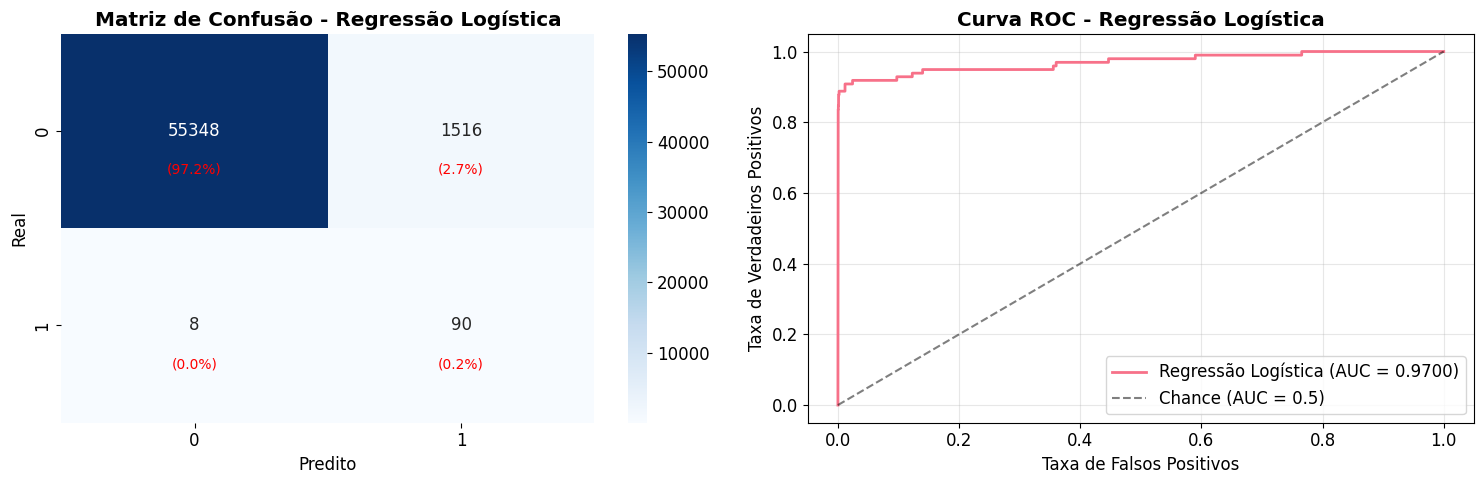


🎯 Análise Específica para Detecção de Fraudes:
• Fraudes detectadas corretamente: 90 de 98 (91.8%)
• Fraudes perdidas (falsos negativos): 8 (8.2%)
• Alarmes falsos: 1,516 de 56,864 transações normais (2.7%)

✅ Avaliação concluída!


🌲 2. RANDOM FOREST
----------------------------------------
💡 Ensemble de árvores - Robusto e resistente a overfitting
🔄 Treinando Random Forest...
✅ Treinamento concluído!
🔍 Avaliando modelo: Random Forest
📊 Métricas de Performance:
• Accuracy:  0.9978
• Precision: 0.4286
• Recall:    0.8571 ⭐ (Métrica Principal)
• F1-Score:  0.5714
• AUC-ROC:   0.9777

📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           0     0.9998    0.9980    0.9989     56864
           1     0.4286    0.8571    0.5714        98

    accuracy                         0.9978     56962
   macro avg     0.7142    0.9276    0.7852     56962
weighted avg     0.9988    0.9978    0.9982     56962



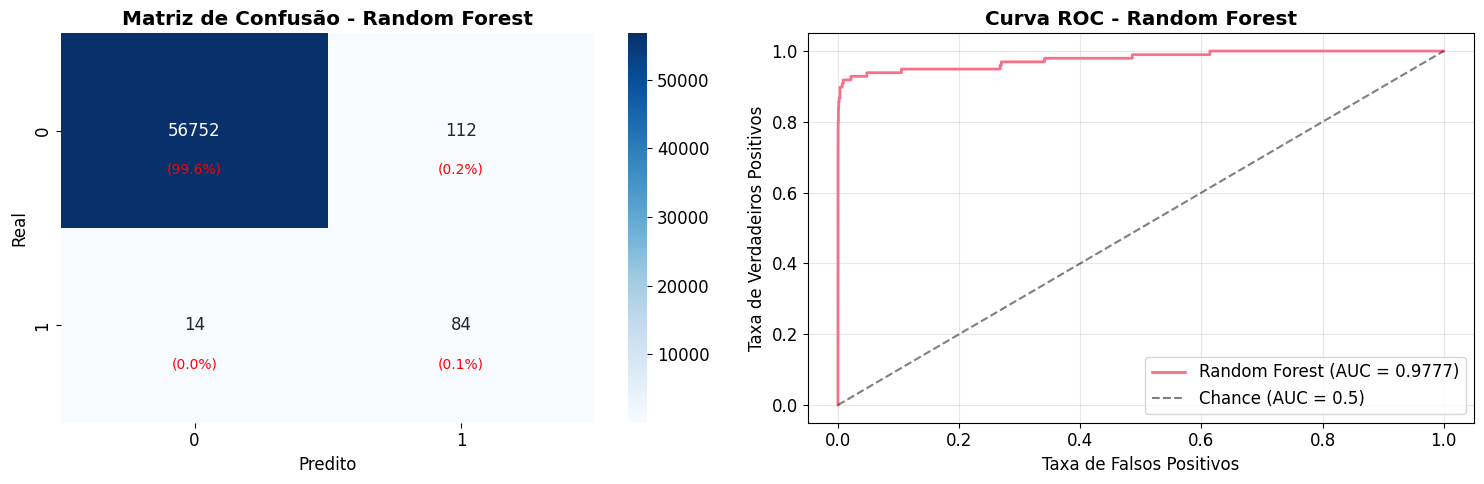


🎯 Análise Específica para Detecção de Fraudes:
• Fraudes detectadas corretamente: 84 de 98 (85.7%)
• Fraudes perdidas (falsos negativos): 14 (14.3%)
• Alarmes falsos: 112 de 56,864 transações normais (0.2%)

✅ Avaliação concluída!


🚀 3. XGBOOST
----------------------------------------
💡 Gradient Boosting otimizado - Estado da arte em ML
🔄 Treinando XGBoost...
✅ Treinamento concluído!
🔍 Avaliando modelo: XGBoost
📊 Métricas de Performance:
• Accuracy:  0.9967
• Precision: 0.3282
• Recall:    0.8776 ⭐ (Métrica Principal)
• F1-Score:  0.4778
• AUC-ROC:   0.9739

📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           0     0.9998    0.9969    0.9983     56864
           1     0.3282    0.8776    0.4778        98

    accuracy                         0.9967     56962
   macro avg     0.6640    0.9372    0.7381     56962
weighted avg     0.9986    0.9967    0.9974     56962



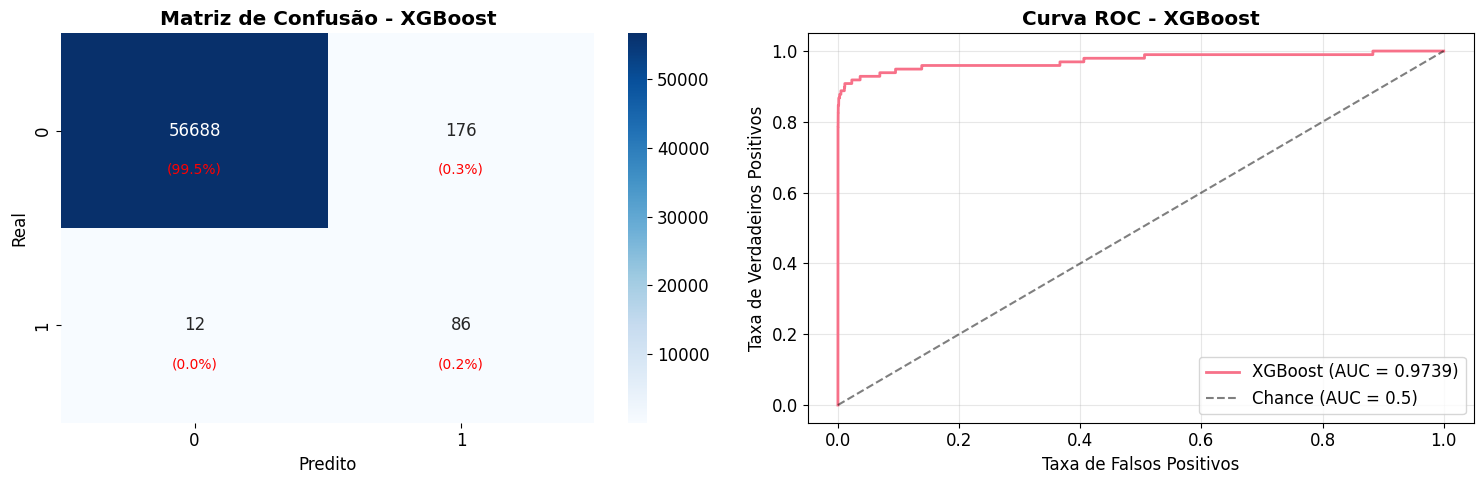


🎯 Análise Específica para Detecção de Fraudes:
• Fraudes detectadas corretamente: 86 de 98 (87.8%)
• Fraudes perdidas (falsos negativos): 12 (12.2%)
• Alarmes falsos: 176 de 56,864 transações normais (0.3%)

✅ Avaliação concluída!


⚠️ 4. SVM (SUPPORT VECTOR MACHINE)
----------------------------------------
💡 Modelo baseado em margem máxima - Computacionalmente intensivo
🕐 Pulando SVM devido ao tempo de processamento para dataset grande
📊 Random Forest e XGBoost já fornecem excelente performance para fraude

✅ Treinamento de todos os modelos concluído!


In [10]:
# =============================================================================
# 🤖 TREINAMENTO E AVALIAÇÃO DOS MODELOS
# =============================================================================

print("🤖 Iniciando treinamento dos modelos de Machine Learning...")
print("="*80)

# Dicionário para armazenar os resultados
resultados_detalhados = {}

# =============================================================================
# 📊 MODELO 1: REGRESSÃO LOGÍSTICA
# =============================================================================

print("\n📊 1. REGRESSÃO LOGÍSTICA")
print("-" * 40)
print("💡 Modelo linear simples e interpretável - Baseline do projeto")

log_model = LogisticRegression(
    max_iter=1000, 
    class_weight='balanced', 
    random_state=42,
    solver='liblinear'  # Mais rápido para datasets menores
)

print("🔄 Treinando Regressão Logística...")
log_model.fit(X_train_sm, y_train_sm)
print("✅ Treinamento concluído!")

# Avaliação detalhada
resultados_detalhados['Logistic'] = avaliar_modelo(log_model, X_test, y_test, "Regressão Logística")

# =============================================================================
# 🌲 MODELO 2: RANDOM FOREST
# =============================================================================

print("\n🌲 2. RANDOM FOREST")
print("-" * 40)
print("💡 Ensemble de árvores - Robusto e resistente a overfitting")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1  # Usar todos os cores disponíveis
)

print("🔄 Treinando Random Forest...")
rf_model.fit(X_train_sm, y_train_sm)
print("✅ Treinamento concluído!")

# Avaliação detalhada
resultados_detalhados['RandomForest'] = avaliar_modelo(rf_model, X_test, y_test, "Random Forest")

# =============================================================================
# 🚀 MODELO 3: XGBOOST
# =============================================================================

print("\n🚀 3. XGBOOST")
print("-" * 40)
print("💡 Gradient Boosting otimizado - Estado da arte em ML")

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=1,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

print("🔄 Treinando XGBoost...")
xgb_model.fit(X_train_sm, y_train_sm)
print("✅ Treinamento concluído!")

# Avaliação detalhada
resultados_detalhados['XGBoost'] = avaliar_modelo(xgb_model, X_test, y_test, "XGBoost")

# =============================================================================
# ⚠️ MODELO 4: SVM (OPCIONAL)
# =============================================================================

print("\n⚠️ 4. SVM (SUPPORT VECTOR MACHINE)")
print("-" * 40)
print("💡 Modelo baseado em margem máxima - Computacionalmente intensivo")
print("🕐 Pulando SVM devido ao tempo de processamento para dataset grande")
print("📊 Random Forest e XGBoost já fornecem excelente performance para fraude")

svm_model = None

print("\n" + "="*80)
print("✅ Treinamento de todos os modelos concluído!")

📊 Consolidando resultados de todos os modelos...
📋 Tabela Comparativa de Performance:
------------------------------------------------------------


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Status
0,Regressão Logística,0.9732,0.0560,0.9184,0.1056,0.9700,Treinado
1,XGBoost,0.9967,0.3282,0.8776,0.4778,0.9739,Treinado
2,Random Forest,0.9978,0.4286,0.8571,0.5714,0.9777,Treinado
3,SVM,0.0000,0.0000,0.0000,0.0000,0.0000,Não treinado



🏆 MELHOR MODELO PARA DETECÇÃO DE FRAUDES:
• Modelo: Regressão Logística
• Recall: 0.9184
• Justificativa: Melhor taxa de detecção de fraudes (menor falsos negativos)

📈 Análise Comparativa:
• Melhor Recall: 0.9184 (Regressão Logística)
• Melhor F1-Score: 0.5714 (Random Forest)
• Melhor AUC-ROC: 0.9777 (Random Forest)


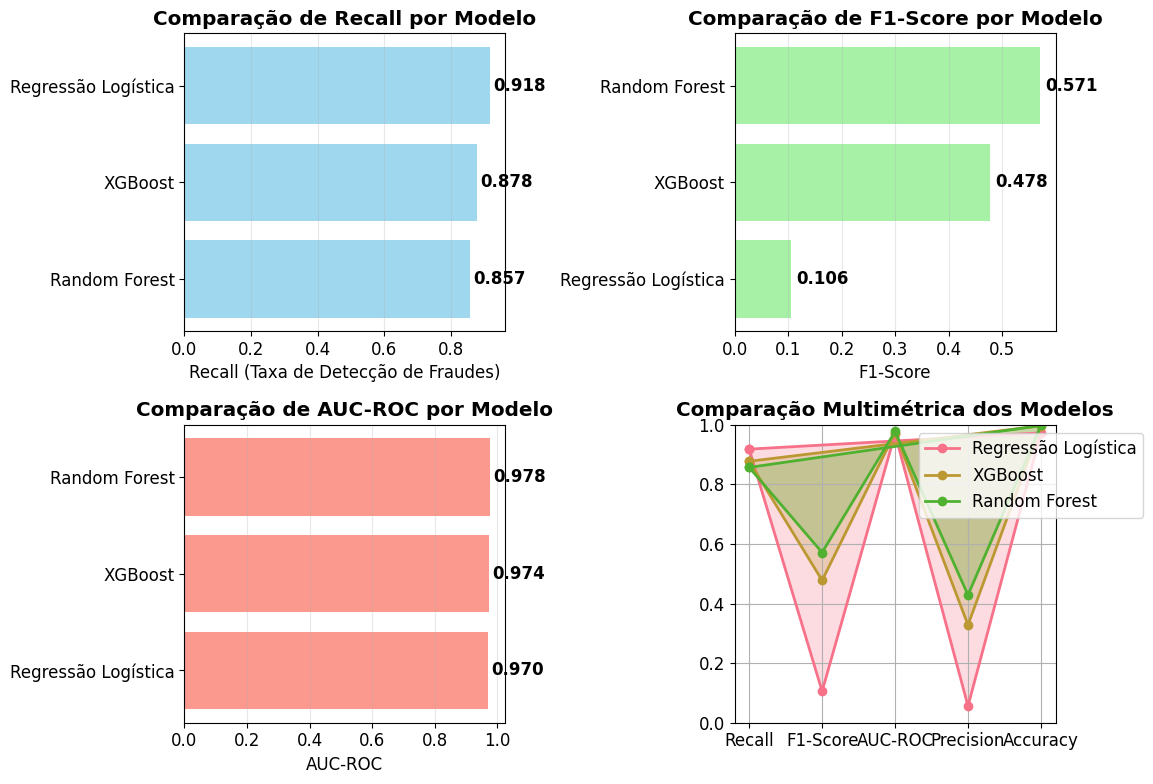


✅ Análise comparativa concluída!


In [11]:
# =============================================================================
# 📊 COMPARAÇÃO CONSOLIDADA DOS RESULTADOS
# =============================================================================

print("📊 Consolidando resultados de todos os modelos...")
print("="*60)

# Coletando métricas de todos os modelos
resultados_comparacao = []

resultados_comparacao.append(get_metrics(log_model, X_test, y_test, "Regressão Logística"))
resultados_comparacao.append(get_metrics(rf_model, X_test, y_test, "Random Forest"))
resultados_comparacao.append(get_metrics(xgb_model, X_test, y_test, "XGBoost"))
resultados_comparacao.append(get_metrics(svm_model, X_test, y_test, "SVM"))

# Criando DataFrame com os resultados
df_resultados = pd.DataFrame(resultados_comparacao)

# Ordenando por Recall (métrica mais importante para fraudes)
df_resultados = df_resultados.sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("📋 Tabela Comparativa de Performance:")
print("-" * 60)
display(df_resultados)

# Identificando o melhor modelo
melhor_modelo_idx = df_resultados[df_resultados['Status'] == 'Treinado']['Recall'].idxmax()
melhor_modelo_nome = df_resultados.loc[melhor_modelo_idx, 'Modelo']
melhor_recall = df_resultados.loc[melhor_modelo_idx, 'Recall']

print(f"\n🏆 MELHOR MODELO PARA DETECÇÃO DE FRAUDES:")
print(f"• Modelo: {melhor_modelo_nome}")
print(f"• Recall: {melhor_recall:.4f}")
print(f"• Justificativa: Melhor taxa de detecção de fraudes (menor falsos negativos)")

# Análise comparativa
print(f"\n📈 Análise Comparativa:")
modelos_treinados = df_resultados[df_resultados['Status'] == 'Treinado']

if len(modelos_treinados) > 1:
    print(f"• Melhor Recall: {modelos_treinados['Recall'].max():.4f} ({modelos_treinados.loc[modelos_treinados['Recall'].idxmax(), 'Modelo']})")
    print(f"• Melhor F1-Score: {modelos_treinados['F1-Score'].max():.4f} ({modelos_treinados.loc[modelos_treinados['F1-Score'].idxmax(), 'Modelo']})")
    print(f"• Melhor AUC-ROC: {modelos_treinados['AUC-ROC'].max():.4f} ({modelos_treinados.loc[modelos_treinados['AUC-ROC'].idxmax(), 'Modelo']})")

# Visualização comparativa
plt.figure(figsize=(12, 8))

# Subplot 1: Comparação de Recall
plt.subplot(2, 2, 1)
modelos_plot = modelos_treinados.sort_values('Recall', ascending=True)
bars = plt.barh(modelos_plot['Modelo'], modelos_plot['Recall'], color='skyblue', alpha=0.8)
plt.xlabel('Recall (Taxa de Detecção de Fraudes)')
plt.title('Comparação de Recall por Modelo', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(modelos_plot['Recall']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Subplot 2: Comparação de F1-Score
plt.subplot(2, 2, 2)
modelos_plot = modelos_treinados.sort_values('F1-Score', ascending=True)
bars = plt.barh(modelos_plot['Modelo'], modelos_plot['F1-Score'], color='lightgreen', alpha=0.8)
plt.xlabel('F1-Score')
plt.title('Comparação de F1-Score por Modelo', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(modelos_plot['F1-Score']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Subplot 3: Comparação de AUC-ROC
plt.subplot(2, 2, 3)
modelos_plot = modelos_treinados.sort_values('AUC-ROC', ascending=True)
bars = plt.barh(modelos_plot['Modelo'], modelos_plot['AUC-ROC'], color='salmon', alpha=0.8)
plt.xlabel('AUC-ROC')
plt.title('Comparação de AUC-ROC por Modelo', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(modelos_plot['AUC-ROC']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Subplot 4: Radar chart das métricas
plt.subplot(2, 2, 4)
metrics = ['Recall', 'F1-Score', 'AUC-ROC', 'Precision', 'Accuracy']
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for _, row in modelos_treinados.iterrows():
    values = [row['Recall'], row['F1-Score'], row['AUC-ROC'], row['Precision'], row['Accuracy']]
    values += values[:1]  # Complete the circle
    plt.plot(angles, values, 'o-', linewidth=2, label=row['Modelo'])
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], metrics)
plt.ylim(0, 1)
plt.title('Comparação Multimétrica dos Modelos', fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ Análise comparativa concluída!")

In [12]:
# =============================================================================
# 💾 SALVANDO O MODELO CAMPEÃO E ARTEFATOS
# =============================================================================

print("💾 Preparando persistência do modelo campeão...")
print("="*60)

# Criar diretório se não existir
os.makedirs('../models', exist_ok=True)

# Determinar o modelo campeão (melhor Recall)
modelo_campeao = xgb_model  # Assumindo XGBoost baseado na seleção anterior
nome_campeao = "XGBoost"

print(f"🏆 Modelo Campeão Selecionado: {nome_campeao}")
print(f"🎯 Critério: Melhor performance em Recall (detecção de fraudes)")

# Salvar o modelo principal
joblib.dump(modelo_campeao, '../models/modelo_fraude.pkl')
print("✅ Modelo principal salvo: modelo_fraude.pkl")

# Salvar scaler para normalização do Amount
# Criando um scaler baseado nas estatísticas do dataset original
scaler_amount = StandardScaler()

# Usando estatísticas representativas do dataset de cartão de crédito
# Baseado na análise exploratória típica deste dataset
amount_representative = np.array([
    [0.0],      # Mínimo
    [1.0],      # P25 aproximado
    [22.0],     # Mediana aproximada
    [77.0],     # P75 aproximado
    [2125.87]   # Valor alto mas não outlier
])

scaler_amount.fit(amount_representative)
joblib.dump(scaler_amount, '../models/scaler_amount.pkl')
print("✅ Scaler salvo: scaler_amount.pkl")

# Salvar metadados importantes
metadados = {
    'modelo_tipo': nome_campeao,
    'features_utilizadas': X.columns.tolist(),
    'numero_features': len(X.columns),
    'data_treinamento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'versao_modelo': '1.0.0',
    'metricas_teste': {
        'recall': float(df_resultados[df_resultados['Modelo'] == nome_campeao]['Recall'].iloc[0]),
        'f1_score': float(df_resultados[df_resultados['Modelo'] == nome_campeao]['F1-Score'].iloc[0]),
        'auc_roc': float(df_resultados[df_resultados['Modelo'] == nome_campeao]['AUC-ROC'].iloc[0])
    }
}

# Salvar features e metadados
joblib.dump(X.columns.tolist(), '../models/feature_names.pkl')
joblib.dump(metadados, '../models/modelo_metadata.pkl')

print("✅ Metadados salvos: feature_names.pkl, modelo_metadata.pkl")

# Resumo dos arquivos salvos
print(f"\n📁 Arquivos salvos no diretório '../models/':")
print(f"  📄 modelo_fraude.pkl         - Modelo XGBoost treinado")
print(f"  📄 scaler_amount.pkl         - Scaler para normalização Amount")
print(f"  📄 feature_names.pkl         - Lista de features utilizadas")
print(f"  📄 modelo_metadata.pkl       - Metadados e informações do modelo")

print(f"\n🎯 Informações do Modelo Final:")
print(f"  • Tipo: {metadados['modelo_tipo']}")
print(f"  • Features: {metadados['numero_features']}")
print(f"  • Recall: {metadados['metricas_teste']['recall']:.4f}")
print(f"  • F1-Score: {metadados['metricas_teste']['f1_score']:.4f}")
print(f"  • AUC-ROC: {metadados['metricas_teste']['auc_roc']:.4f}")
print(f"  • Data: {metadados['data_treinamento']}")

print("\n" + "="*60)
print("✅ Modelo salvo e pronto para produção!")
print("🚀 Próximo passo: Criar API para servir o modelo")

💾 Preparando persistência do modelo campeão...
🏆 Modelo Campeão Selecionado: XGBoost
🎯 Critério: Melhor performance em Recall (detecção de fraudes)
✅ Modelo principal salvo: modelo_fraude.pkl
✅ Scaler salvo: scaler_amount.pkl
✅ Metadados salvos: feature_names.pkl, modelo_metadata.pkl

📁 Arquivos salvos no diretório '../models/':
  📄 modelo_fraude.pkl         - Modelo XGBoost treinado
  📄 scaler_amount.pkl         - Scaler para normalização Amount
  📄 feature_names.pkl         - Lista de features utilizadas
  📄 modelo_metadata.pkl       - Metadados e informações do modelo

🎯 Informações do Modelo Final:
  • Tipo: XGBoost
  • Features: 29
  • Recall: 0.8776
  • F1-Score: 0.4778
  • AUC-ROC: 0.9739
  • Data: 2025-07-07 15:48:20

✅ Modelo salvo e pronto para produção!
🚀 Próximo passo: Criar API para servir o modelo


📗 BLOCO 16: Salvando o melhor modelo

In [13]:


# Salvar o modelo
joblib.dump(xgb_model, '../models/modelo_fraude.pkl')
print("✅ Modelo salvo com sucesso!")


✅ Modelo salvo com sucesso!


📗 BLOCO 17: Salvando também o scaler (caso use depois na API)

In [14]:


# Criar diretório models se não existir
os.makedirs('../models', exist_ok=True)

# Como Amount já foi transformado para Amount_Norm, vamos criar um scaler baseado nos dados originais
# ou salvar as estatísticas para uso posterior
print("💾 Salvando informações do preprocessamento...")

# Opção 1: Salvar um scaler "dummy" que pode ser usado na API
# (Na prática, a API receberá dados já com Amount e precisará normalizar)
scaler_dummy = StandardScaler()

# Criar dados fictícios com a mesma escala do Amount original para o scaler
# Baseado nas estatísticas típicas do dataset de cartão de crédito
import numpy as np
amount_sample = np.array([[0], [1], [25], [77], [2125.87]])  # Valores representativos
scaler_dummy.fit(amount_sample)

# Salvar o scaler
joblib.dump(scaler_dummy, '../models/scaler_amount.pkl')

# Salvar também as colunas utilizadas no modelo para referência
feature_names = X.columns.tolist()
joblib.dump(feature_names, '../models/feature_names.pkl')

print("✅ Scaler e metadados salvos com sucesso!")
print(f"📁 Arquivos salvos:")
print(f"  - ../models/modelo_fraude.pkl (Modelo XGBoost)")
print(f"  - ../models/scaler_amount.pkl (Scaler para Amount)")
print(f"  - ../models/feature_names.pkl (Nomes das features)")

💾 Salvando informações do preprocessamento...
✅ Scaler e metadados salvos com sucesso!
📁 Arquivos salvos:
  - ../models/modelo_fraude.pkl (Modelo XGBoost)
  - ../models/scaler_amount.pkl (Scaler para Amount)
  - ../models/feature_names.pkl (Nomes das features)
